In [28]:
import pandas as pd
import numpy as np
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [29]:
data=pd.read_csv("iris.csv")

In [30]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>

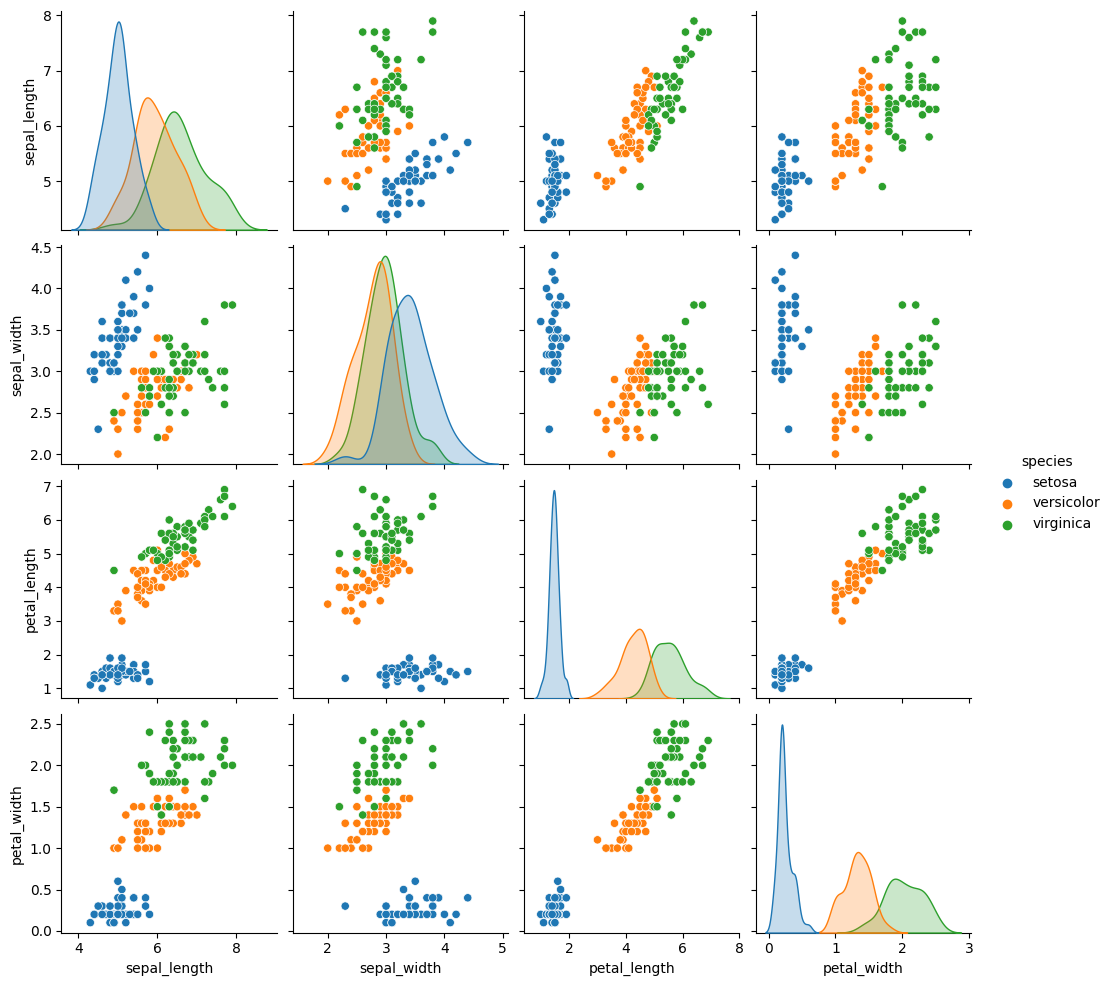

In [31]:
#plot pair plot
sns.pairplot(data,hue='species')

In [32]:
optimized_data=data[data["species"]!="setosa"]

In [33]:
optimized_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


<IPython.core.display.Javascript object>

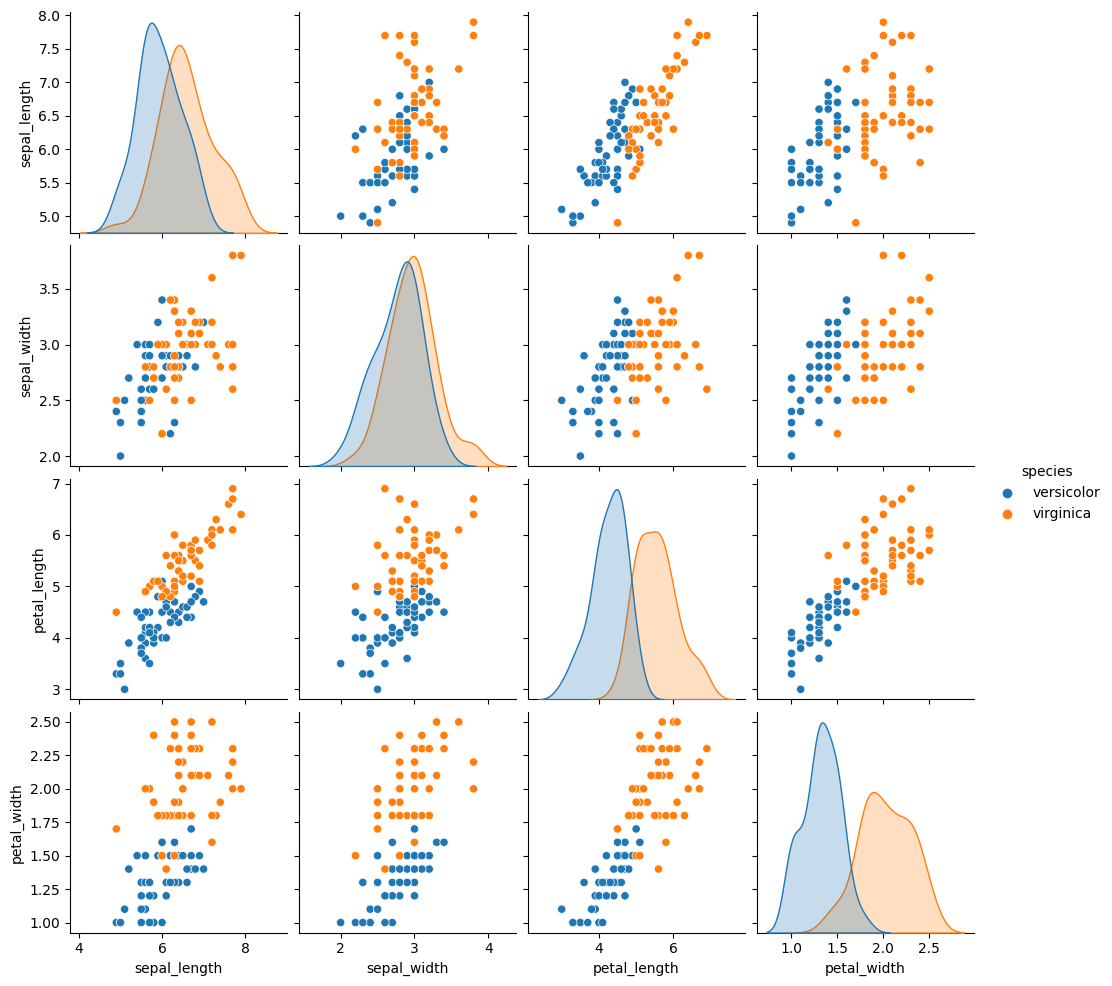

In [34]:
#plot pair plot
sns.pairplot(optimized_data,hue='species')

In [35]:
X=optimized_data.drop('species',axis=1)

In [36]:
y=optimized_data[["species"]]

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.model_selection import cross_val_score

In [48]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=DecisionTreeClassifier()

In [49]:
estimators=[("LOG",clf1),("KNE",clf2),("DTC",clf3)]

In [50]:
estimators[0]

('LOG', LogisticRegression())

In [51]:
estimators[1]

('KNE', KNeighborsClassifier())

In [52]:
estimators[2]

('DTC', DecisionTreeClassifier())

In [53]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=5,scoring="accuracy")
    print(estimator[0] , np.round(np.mean(x),2))

LOG 0.96
KNE 0.96
DTC 0.95


# Ensembling with voting

# hard Voting

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
VCh=VotingClassifier(estimators=estimators,voting="hard")

In [63]:
VCa=cross_val_score(VC,X,y,cv=5,scoring="accuracy")

In [64]:
round(np.mean(VCa),2)

0.96

# soft voting

In [67]:
VCs=VotingClassifier(estimators=estimators,voting="soft")

In [68]:
VCsa=cross_val_score(VCs,X,y,cv=5,scoring="accuracy")

In [69]:
round(np.mean(VCsa),2)

0.95